##**Mounting Drive**

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/Personal_Projects')

Mounted at /content/drive


##**Insights On The Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [ ]:
data = pd.read_csv("Credit_Scoring.csv")
data.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
0,good,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846,94.562648,4.200000
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658,60.313631,4.980000
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985,67.001675,1.980000
3,good,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325,67.924528,7.933333
4,good,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910,34.065934,7.083871


In [ ]:
# Dataset Dimensions
data.shape

(4446, 16)

In [ ]:
# Checking if any Missing Values are there in the Dataset
data.isnull().any()

Status       False
Seniority    False
Home         False
Time         False
Age          False
Marital      False
Records      False
Job          False
Expenses     False
Income       False
Assets       False
Debt         False
Amount       False
Price        False
Finrat       False
Savings      False
dtype: bool

In [ ]:
# Checking if any categorical Features are there in the Dataset
categorical_data = data.select_dtypes(exclude=[np.number])
print ("There are {} categorical Columns in Dataset".format(categorical_data.shape[1]))

There are 5 categorical Columns in Dataset


In [ ]:
# Name of all the Categorical Features Present in the Dataset
categorical_data.any()

Status     True
Home       True
Marital    True
Records    True
Job        True
dtype: bool

In [ ]:
model = LabelEncoder()
data['Status'] = model.fit_transform(data['Status'].astype('str'))
data['Home'] = model.fit_transform(data['Home'].astype('str'))
data['Marital'] = model.fit_transform(data['Marital'].astype('str'))
data['Job'] = model.fit_transform(data['Job'].astype('str'))
data['Records'] = model.fit_transform(data['Records'].astype('str'))

In [ ]:
#Checking Data Types of the Features for Confirmation
data.dtypes

Status         int64
Seniority      int64
Home           int64
Time           int64
Age            int64
Marital        int64
Records        int64
Job            int64
Expenses       int64
Income         int64
Assets         int64
Debt           int64
Amount         int64
Price          int64
Finrat       float64
Savings      float64
dtype: object

In [ ]:
# Summary of the Data
data.describe()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,0.719073,7.991453,2.862348,46.453441,37.084121,1.503599,0.172964,0.610886,55.601439,140.629780,5354.948943,342.257085,1038.763383,1462.480432,72.616409,3.860083
std,0.449502,8.176370,1.308943,14.647979,10.986366,0.891838,0.378259,0.960975,19.520839,80.177896,11534.328183,1244.694549,474.747952,628.555171,20.390595,3.726292
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,0.000000,0.000000,35.000000,1.000000,0.000000,0.000000,100.000000,105.000000,6.702413,-8.160000
25%,0.000000,2.000000,2.000000,36.000000,28.000000,1.000000,0.000000,0.000000,35.000000,90.000000,0.000000,0.000000,700.000000,1116.250000,60.030020,1.615385
50%,1.000000,5.000000,2.000000,48.000000,36.000000,1.000000,0.000000,0.000000,51.000000,124.000000,3000.000000,0.000000,1000.000000,1400.000000,77.096757,3.120000
75%,1.000000,12.000000,4.000000,60.000000,45.000000,2.000000,0.000000,1.000000,72.000000,170.000000,6000.000000,0.000000,1300.000000,1691.500000,88.460263,5.195688
max,1.000000,48.000000,5.000000,72.000000,68.000000,4.000000,1.000000,3.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000,100.000000,33.250000


In [ ]:
# Value Counts of 'GOOD' Status and 'BAD' Status
# 'GOOD': 1 and 'BAD': 0
data.Status.value_counts()

1    3197
0    1249
Name: Status, dtype: int64

In [ ]:
# As per the Dataset there are approximately 72% GOOD Score and 28% BAD Score instances
status_count = data.Status.value_counts()/len(data)
status_count

1    0.719073
0    0.280927
Name: Status, dtype: float64

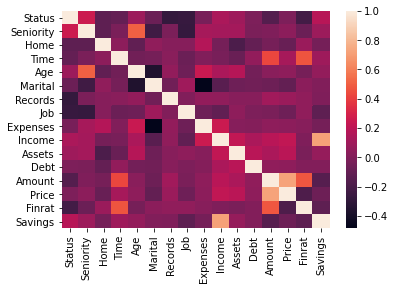

In [ ]:
# Correlation between all the Features
# Correlation heatmap
corr = data.corr()
sns.heatmap(corr)

In [ ]:
# Correlation Values of all the Features with respect to Target Variable 'Status' 
print (corr['Status'].sort_values(ascending=False), '\n')

Status       1.000000
Seniority    0.259742
Savings      0.185516
Income       0.144362
Assets       0.097239
Age          0.095305
Price       -0.010144
Debt        -0.010408
Expenses    -0.029633
Marital     -0.072958
Time        -0.101057
Home        -0.123475
Amount      -0.154325
Finrat      -0.221790
Job         -0.267701
Records     -0.277817
Name: Status, dtype: float64 



In [ ]:
## Visualising Correlation Matrix with actual Correlation Values
cmap=sns.diverging_palette(5, 250, as_cmap=True)

corr.style.background_gradient(cmap, axis=1).set_properties(**{'max-width': '80px', 'font-size': '10pt'}).set_caption("Correlation Matrix").set_precision(3)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Finrat,Savings
Status,1.000,0.260,-0.123,-0.101,0.095,-0.073,-0.278,-0.268,-0.030,0.144,0.097,-0.010,-0.154,-0.010,-0.222,0.186
Seniority,0.260,1.000,-0.121,-0.022,0.506,-0.229,-0.016,-0.271,0.126,0.121,0.124,-0.019,-0.008,0.041,-0.073,0.093
Home,-0.123,-0.121,1.000,0.041,-0.108,0.052,0.020,0.016,0.176,-0.039,-0.183,-0.098,-0.032,-0.087,0.089,-0.041
Time,-0.101,-0.022,0.041,1.000,-0.052,-0.039,0.028,-0.077,-0.002,-0.030,-0.083,0.058,0.431,0.130,0.469,0.102
Age,0.095,0.506,-0.108,-0.052,1.000,-0.358,0.060,-0.061,0.248,0.148,0.181,-0.046,0.029,0.049,-0.035,0.062
Marital,-0.073,-0.229,0.052,-0.039,-0.358,1.000,-0.054,0.106,-0.484,-0.141,-0.062,-0.054,-0.072,-0.102,0.033,0.000
Records,-0.278,-0.016,0.020,0.028,0.060,-0.054,1.000,-0.000,0.058,0.053,0.021,0.023,0.111,0.085,0.051,-0.003
Job,-0.268,-0.271,0.016,-0.077,-0.061,0.106,-0.000,1.000,-0.064,-0.111,0.045,-0.010,-0.026,-0.063,0.052,-0.123
Expenses,-0.030,0.126,0.176,-0.002,0.248,-0.484,0.058,-0.064,1.000,0.255,0.019,0.015,0.050,0.041,0.025,-0.038
Income,0.144,0.121,-0.039,-0.030,0.148,-0.141,0.053,-0.111,0.255,1.000,0.219,0.145,0.191,0.218,-0.003,0.718


**Histogram Plots of all the Features in the Dataset**

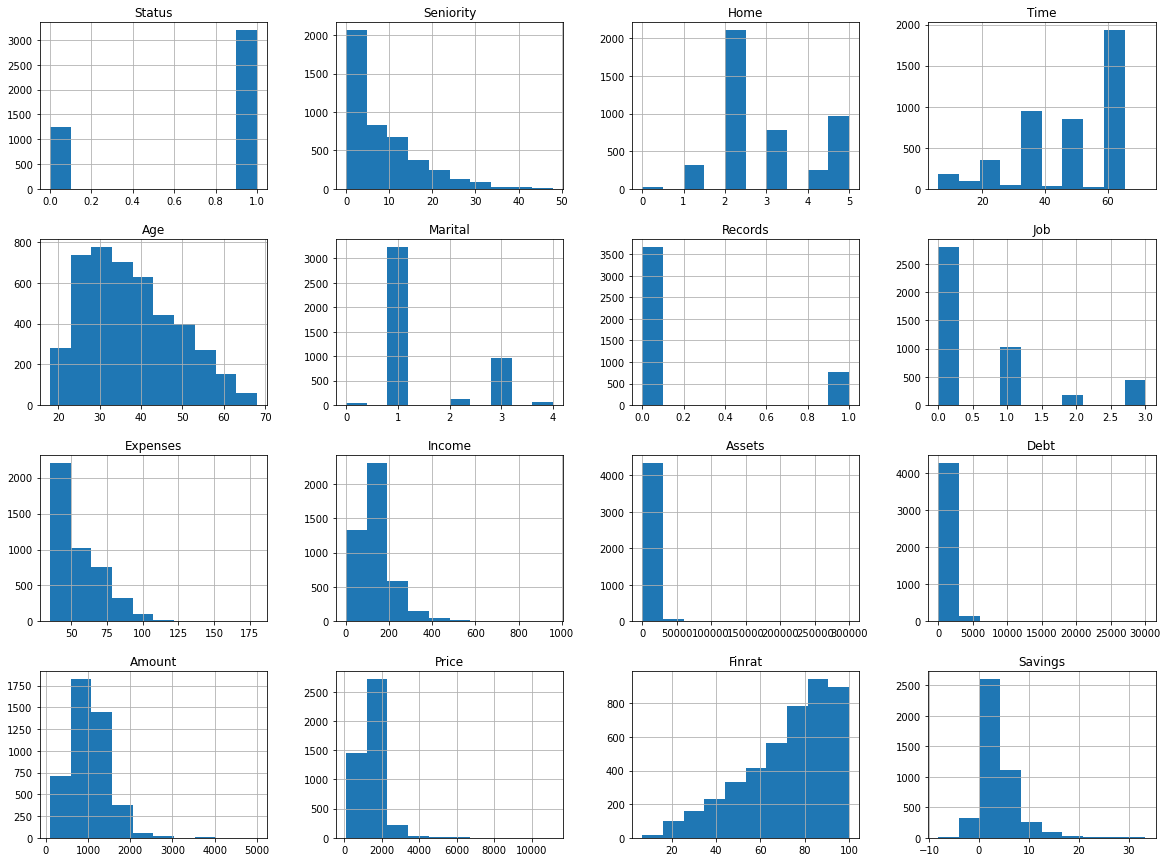

In [ ]:
num_bins = 10
data.hist(bins = num_bins, figsize=(20,15))
plt.savefig("Data_Histogram_Plots")
plt.show()

**Creating Dummy Variables**

In [ ]:
list(data.columns)

['Status',
 'Seniority',
 'Home',
 'Time',
 'Age',
 'Marital',
 'Records',
 'Job',
 'Expenses',
 'Income',
 'Assets',
 'Debt',
 'Amount',
 'Price',
 'Finrat',
 'Savings']

In [ ]:
feature_cols = list(data.columns)
feature_cols.remove('Status')
feature_cols

['Seniority',
 'Home',
 'Time',
 'Age',
 'Marital',
 'Records',
 'Job',
 'Expenses',
 'Income',
 'Assets',
 'Debt',
 'Amount',
 'Price',
 'Finrat',
 'Savings']

In [ ]:
label = data['Status']

In [ ]:
credit_data = pd.get_dummies(data[feature_cols], drop_first = True)
len(credit_data.columns)

15